In [36]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import mne
import seaborn as sns
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
import warnings
from scipy import signal
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy import misc


from sklearn.metrics import mean_squared_error
from math import sqrt
sns.set_context("poster", font_scale=1.4)

In [37]:
# pull out pickles and plot them out on the same 

# pull out pickles and plot them out on the same 
cs_r = open("CS_comparison.p","rb")
cs_r = pickle.load(cs_r)
cs_rest = pd.DataFrame()
cs_rest['sensor'] = cs_r['sensor']
cs_rest['band'] = cs_r['moving_average_5_band']

ad_r = open("AD_comparison.p","rb")
ad_r = pickle.load(ad_r)

ad_a = open("AD_acc_comparison.p","rb")
ad_a = pickle.load(ad_a)

st_r = open("stuti_rest_comparison.p","rb")
st_r = pickle.load(st_r)

st_a = open("stuti_acc_comparison.p","rb")
st_a = pickle.load(st_a)

x = np.linspace(cs_rest.min().min(),st_a.max().max())

In [46]:
arrays = cs_rest, ad_r, ad_a, st_r, st_a

for each in arrays:
    each['error'] = (each.sensor-each.band)/each.band

In [80]:
for each in arrays:
    print(f'{abs(each.error.mean())*100:.2f}')

1.58
1.30
3.16
0.05
4.82


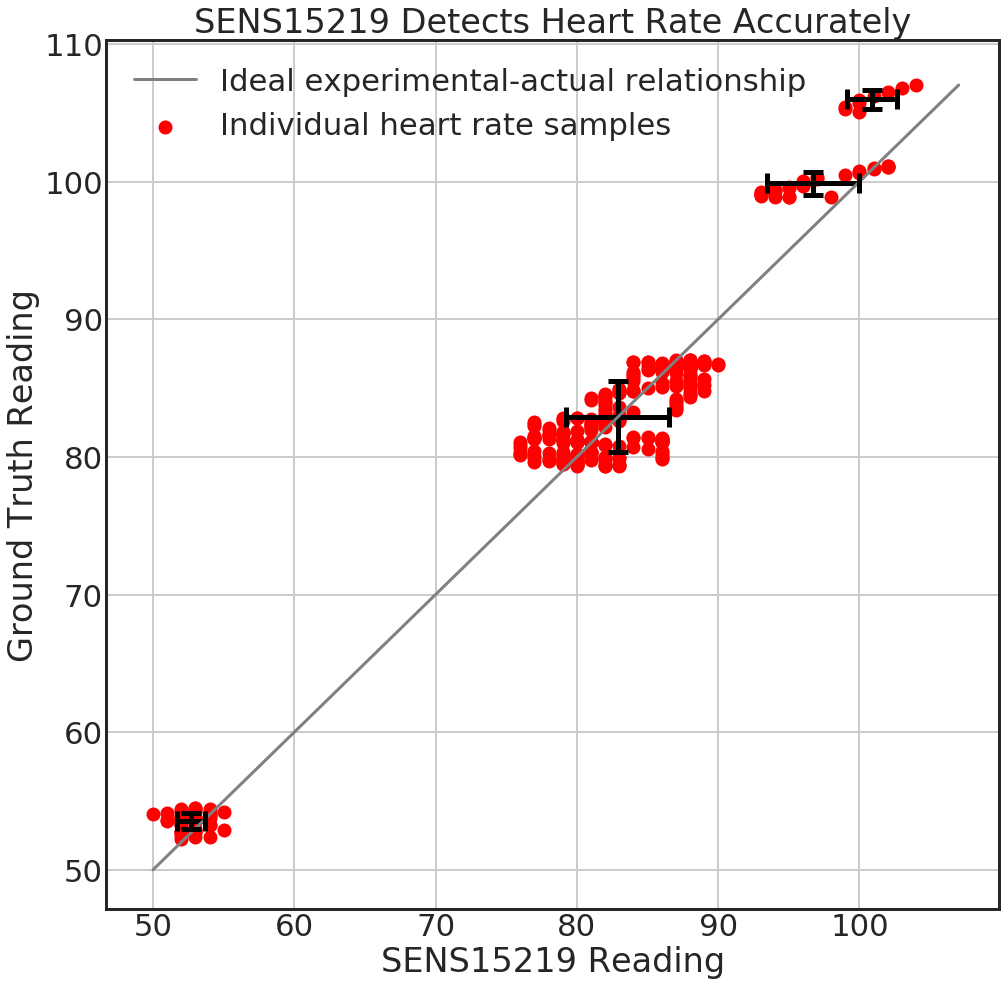

In [58]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 3
    fig, ax = plt.subplots(1,1, figsize = (16,16))
    plt.plot(x, x, label = 'Ideal experimental-actual relationship', color = 'grey')

    plt.scatter(cs_rest.sensor,cs_rest.band, color = 'red', label = 'Individual heart rate samples')
    # plt.scatter(ad_r.sensor,ad_r.band, color = 'orange')
    plt.scatter(ad_a.sensor,ad_a.band, color = 'red')
    plt.scatter(st_r.sensor,st_r.band, color = 'red')
    plt.scatter(st_a.sensor,st_a.band, color = 'red')
    plt.errorbar(cs_rest.sensor.mean(), cs_rest.band.mean(), xerr=cs_rest.sensor.std(),  yerr= cs_rest.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
    plt.errorbar(ad_a.sensor.mean(), ad_a.band.mean(), xerr=ad_a.sensor.std(), yerr= ad_a.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
    plt.errorbar(st_r.sensor.mean(), st_r.band.mean(), xerr=st_r.sensor.std(),  yerr= st_r.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
    plt.errorbar(st_a.sensor.mean(), st_a.band.mean(), xerr=st_a.sensor.std(),  yerr= st_a.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')

#     yerr is the standard error of the band, xerr is the standard error of the sensor
#     plt.errorbar(cs_rest.sensor.mean(), cs_rest.band.mean(), xerr=cs_rest.sensor.std(),  yerr= cs_rest.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
#     plt.errorbar(ad_a.sensor.mean(), ad_a.band.mean(), xerr=ad_a.sensor.std(), yerr= ad_a.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
#     plt.errorbar(st_r.sensor.mean(), st_r.band.mean(), xerr=st_r.sensor.std(),  yerr= st_r.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
#     plt.errorbar(st_a.sensor.mean(), st_a.band.mean(), xerr=st_a.sensor.std(),  yerr= st_a.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')


    plt.legend()
    plt.xlabel('SENS15219 Reading')
    plt.ylabel('Ground Truth Reading')
    plt.title('SENS15219 Detects Heart Rate Accurately');



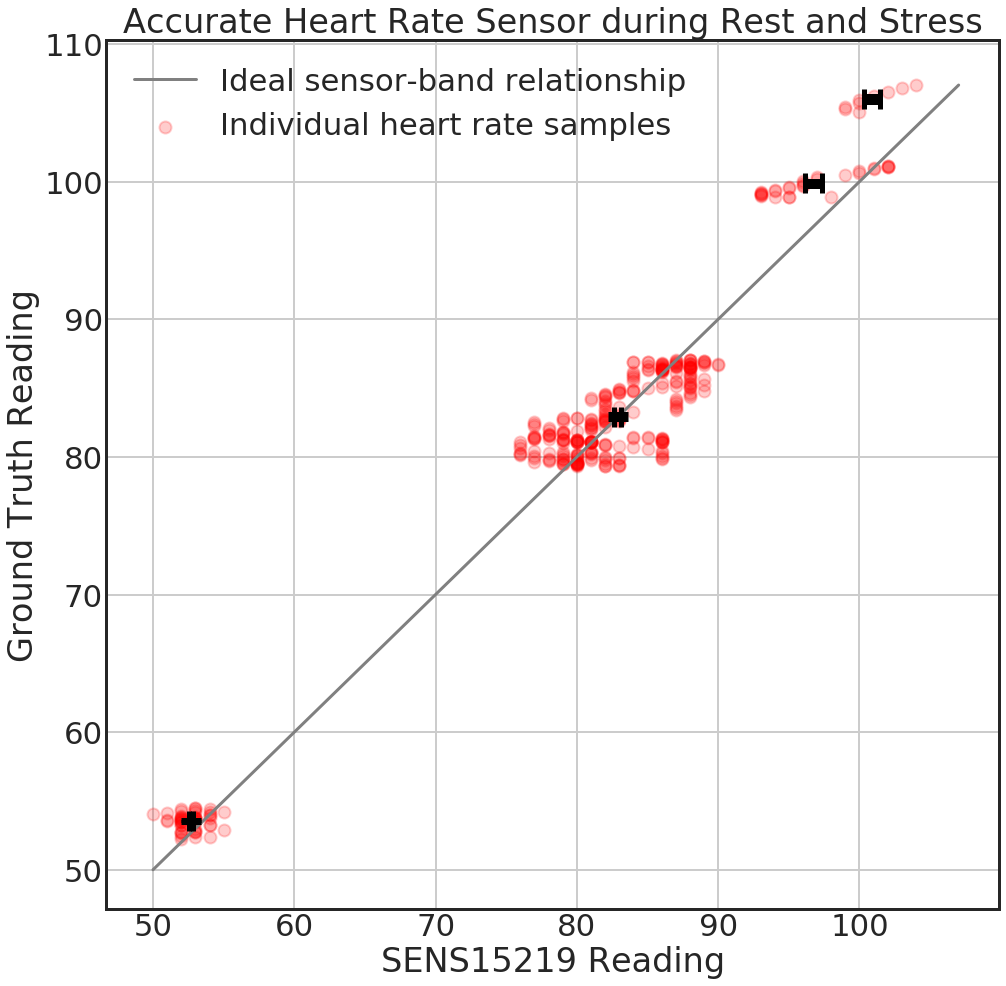

In [62]:
cs_r = cs_rest
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 3
    fig, ax = plt.subplots(1,1, figsize = (16,16))
    plt.plot(x, x, label = 'Ideal sensor-band relationship', color = 'grey')

    plt.scatter(cs_r.sensor,cs_r.band, color = 'red', label = 'Individual heart rate samples', alpha = 0.2)
    # plt.scatter(ad_r.sensor,ad_r.band, color = 'orange')
    plt.scatter(ad_a.sensor,ad_a.band, color = 'red', alpha = 0.2)
    plt.scatter(st_r.sensor,st_r.band, color = 'red', alpha = 0.2)
    plt.scatter(st_a.sensor,st_a.band, color = 'red', alpha = 0.2)
#     plt.errorbar(cs_r.sensor.mean(), cs_r.band.mean(), xerr=cs_r.sensor.std(),  yerr= cs_r.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
#     plt.errorbar(ad_a.sensor.mean(), ad_a.band.mean(), xerr=ad_a.sensor.std(), yerr= ad_a.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
#     plt.errorbar(st_r.sensor.mean(), st_r.band.mean(), xerr=st_r.sensor.std(),  yerr= st_r.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
#     plt.errorbar(st_a.sensor.mean(), st_a.band.mean(), xerr=st_a.sensor.std(),  yerr= st_a.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')

#     yerr is the standard error of the band, xerr is the standard error of the sensor
    plt.errorbar(cs_r.sensor.mean(), cs_r.band.mean(), xerr=sp.stats.sem(cs_r.sensor),  yerr= sp.stats.sem(cs_r.band), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
    plt.errorbar(ad_a.sensor.mean(), ad_a.band.mean(), xerr=sp.stats.sem(ad_a.sensor), yerr= sp.stats.sem(ad_a.band), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
    plt.errorbar(st_r.sensor.mean(), st_r.band.mean(), xerr=sp.stats.sem(st_r.sensor),  yerr= sp.stats.sem(st_r.band), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
    plt.errorbar(st_a.sensor.mean(), st_a.band.mean(), xerr=sp.stats.sem(st_a.sensor),  yerr= sp.stats.sem(st_a.band), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')


    plt.legend()
    plt.xlabel('SENS15219 Reading')
    plt.ylabel('Ground Truth Reading')
    plt.title('Accurate Heart Rate Sensor during Rest and Stress');



In [51]:
cs_r.sensor

0     52
1     52
2     52
3     53
4     53
5     53
6     53
7     54
8     54
9     53
10    52
11    54
12    55
13    53
14    52
15    52
16    52
17    53
18    54
19    54
20    53
21    52
22    54
23    52
24    52
25    51
26    51
27    52
28    53
29    51
30    53
31    53
32    54
33    52
34    53
35    50
36    52
37    53
38    53
39    52
40    53
41    55
42    54
43    53
44    52
45    52
46    52
47    53
48    52
49    52
50    53
Name: sensor, dtype: int64

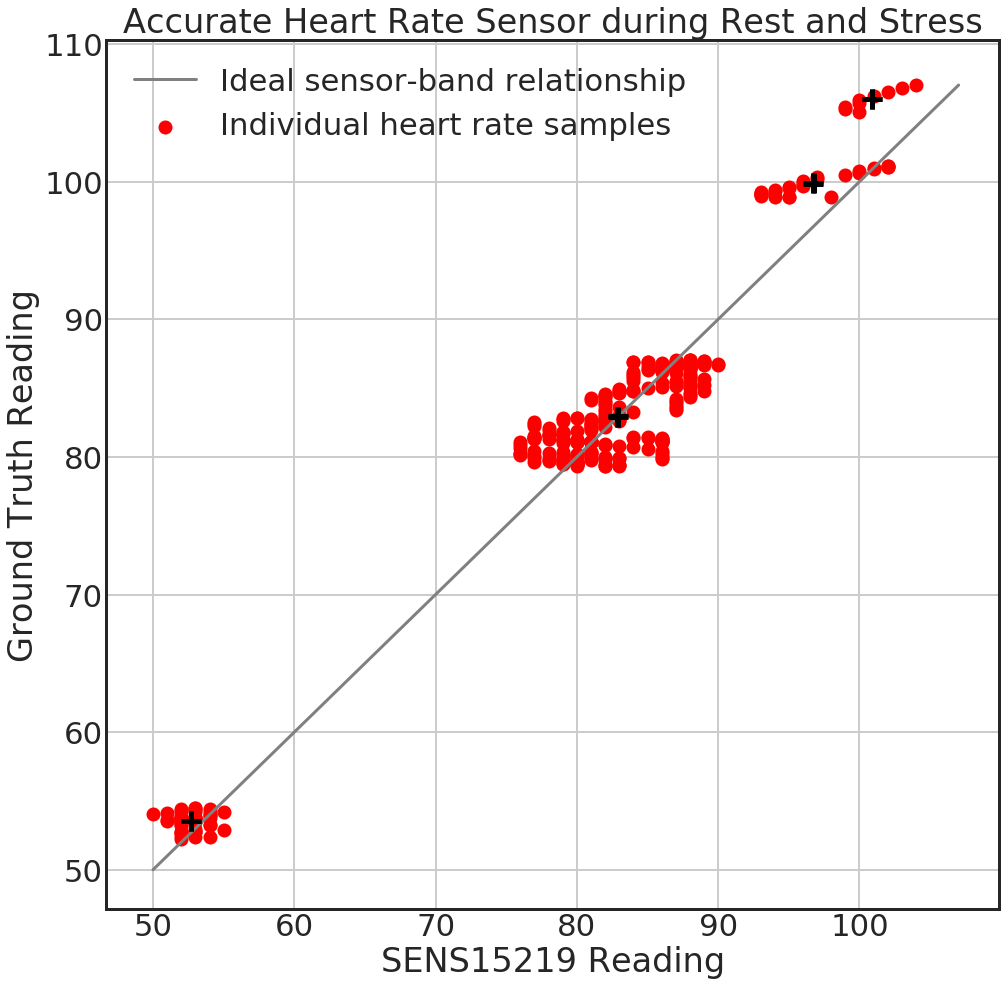

In [53]:
cs_r = cs_rest
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 3
    fig, ax = plt.subplots(1,1, figsize = (16,16))
    plt.plot(x, x, label = 'Ideal sensor-band relationship', color = 'grey')

    plt.scatter(cs_r.sensor,cs_r.band, color = 'red', label = 'Individual heart rate samples')
    # plt.scatter(ad_r.sensor,ad_r.band, color = 'orange')
    plt.scatter(ad_a.sensor,ad_a.band, color = 'red')
    plt.scatter(st_r.sensor,st_r.band, color = 'red')
    plt.scatter(st_a.sensor,st_a.band, color = 'red')
#     plt.errorbar(cs_r.sensor.mean(), cs_r.band.mean(), xerr=cs_r.sensor.std(),  yerr= cs_r.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
#     plt.errorbar(ad_a.sensor.mean(), ad_a.band.mean(), xerr=ad_a.sensor.std(), yerr= ad_a.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
#     plt.errorbar(st_r.sensor.mean(), st_r.band.mean(), xerr=st_r.sensor.std(),  yerr= st_r.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
#     plt.errorbar(st_a.sensor.mean(), st_a.band.mean(), xerr=st_a.sensor.std(),  yerr= st_a.band.std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')

#     yerr is the standard error of the band, xerr is the standard error of the sensor
    plt.errorbar(cs_r.sensor.mean(), cs_r.band.mean(), xerr=(cs_r.error).std(),  yerr= (cs_r.error).std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
    plt.errorbar(ad_a.sensor.mean(), ad_a.band.mean(), xerr=(ad_a.error).std(), yerr= (ad_a.error).std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
    plt.errorbar(st_r.sensor.mean(), st_r.band.mean(), xerr=(st_r.error).std(),  yerr= (st_r.error).std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')
    plt.errorbar(st_a.sensor.mean(), st_a.band.mean(), xerr=(st_a.error).std(),  yerr= (st_a.error).std(), capsize=10,elinewidth=5, barsabove=True, capthick=5, ecolor = 'black')


    plt.legend()
    plt.xlabel('SENS15219 Reading')
    plt.ylabel('Ground Truth Reading')
    plt.title('Accurate Heart Rate Sensor during Rest and Stress');



In [40]:
(cs_rest.stde.mean() + st_a.stde.mean() + ad_a.stde.mean() + ad_r.stde.mean())/4

1.6790985782081211

In [90]:
ad_r.stde.mean()

1.8889622641509436

In [92]:
ad_a.stde.mean()

1.6991379310344827

In [38]:
st_a.stde.mean()

2.551666666666667